# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}



In [5]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [6]:
# Etterspørsel i likning (1)

def x_d(p,T):
    return 500 - 3.2*p*(1+T)

# Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)


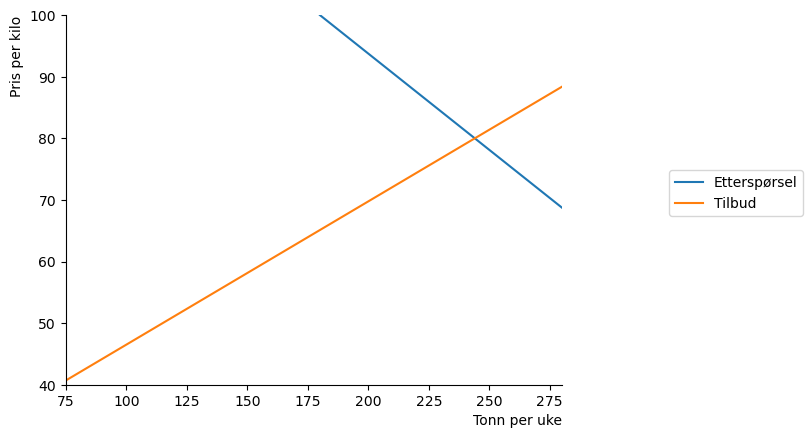

In [7]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num,0),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

   
1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).
2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.
3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?


Helningen til den ny tilbudsfunksjonen er brattere fordi tilbyderne må kompensere for merverdiavgift.


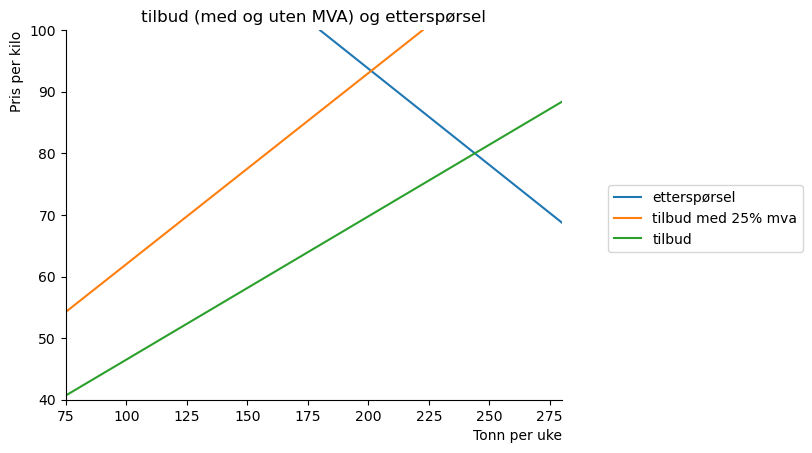

In [9]:
# Oppgave 1
# etterspørselsfunksjon 

def x_d(p,T):
    return 500 - 3.2*p*(1+T)

# tilbudsfunksjon 

def x_s(p,t):
    return -100+4.3*p*(1-t)

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig2, ax = create_ax()

# plotter funksjonene

ax.plot(x_d(p_num,0),p_num, label='etterspørsel')

ax.plot(x_s(p_num, 0.25),p_num, label='tilbud med 25% mva')

ax.plot(x_s(p_num, 0),p_num, label='tilbud')

ax.set_title('tilbud (med og uten MVA) og etterspørsel')


ax.legend(bbox_to_anchor=(1.5,0.6));

print(f'Helningen til den ny tilbudsfunksjonen er brattere fordi tilbyderne må kompensere for merverdiavgift.')

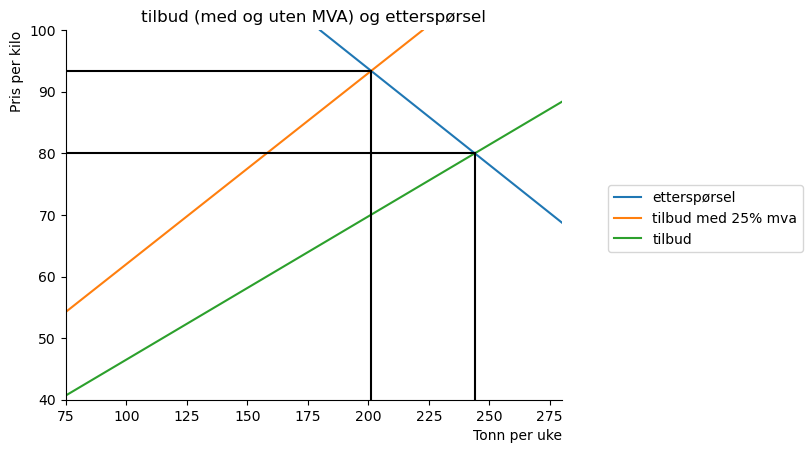

In [15]:
# Oppgave 2 

x,p,t,T=sp.symbols('x p t T', positive=True, real=True)

# betingelse for likevekt (likevekt med mva)

eq_mva = sp.Eq(500-3.2*p,-100+4.3*p*0.75)

# betingelse for likevekt (uten mva)

eq = sp.Eq(500-3.2*p, -100+4.3*p)

# løser for p (først med så uten mva)

p_equil = sp.solve(eq,p)

p_equil_mva = sp.solve(eq_mva,p)

fig2, ax = create_ax()

ax.set_title('tilbud (med og uten MVA) og etterspørsel')

ax.plot(x_d(p_num,0),p_num, label='etterspørsel')

ax.plot(x_s(p_num, 0.25),p_num, label='tilbud med 25% mva')

ax.plot(x_s(p_num, 0),p_num, label='tilbud')

# likevekt i orginalt tilbud

ax.plot ([0, x_s(p_equil[0], 0)], [p_equil[0], p_equil[0]], color='black')
ax.plot ([x_s(p_equil[0], 0), x_s(p_equil[0], 0)], [0, p_equil[0]], color='black')

# likevekt i nytt tilbud 

ax.plot ([0, x_s(p_equil_mva[0], 0.25)], [p_equil_mva[0], p_equil_mva[0]], color='black')
ax.plot ([x_s(p_equil_mva[0], 0.25), x_s(p_equil_mva[0], 0.25)], [0, p_equil_mva[0]], color='black')

ax.legend(bbox_to_anchor=(1.5,0.6));

In [124]:
# Oppgave 3 